# Data cleaning

In [3]:
library(data.table)


data_raw <- fread(
  "Predator_and_prey_body_sizes_in_marine_food_webs.csv",
  sep = "\t",
  quote = "",
  encoding = "Latin-1",
  header = TRUE,
  fill = TRUE,
  stringsAsFactors = FALSE
)


names(data_raw) <- trimws(names(data_raw))
names(data_raw) <- gsub('[\"\' ]+', "_", names(data_raw))
names(data_raw) <- gsub("_$", "", names(data_raw))
names(data_raw) <- gsub("__+", "_", names(data_raw))



cols_to_keep <- c(
  "Record_number", "Individual_ID", "Predator",
  "Predator_taxon", "Predator_lifestage",
  "Type_of_feeding_interaction", "Standardised_predator_length",
  "SI_predator_mass", "Diet_coverage",
  "Prey", "Prey_taxon", "SI_prey_length", "SI_prey_mass",
  "Geographic_location", "Latitude", "Longitude",
  "Depth", "Mean_annual_temp", "SD_annual_temp",
  "Mean_PP", "SD_PP", "Specific_habitat"
)

cols_to_keep <- intersect(cols_to_keep, names(data_raw)) 


data_clean <- data_raw[, ..cols_to_keep]


head(data_clean)


fwrite(data_clean, "data_cleaned.csv")


Individual_ID,Predator,Predator_taxon,Predator_lifestage,Type_of_feeding_interaction,Standardised_predator_length,SI_predator_mass,Diet_coverage,Prey,Prey_taxon,...,SI_prey_mass,Geographic_location,Latitude,Longitude,Depth,Mean_annual_temp,SD_annual_temp,Mean_PP,SD_PP,Specific_habitat
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,...,<dbl>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<int>,<dbl>,<chr>
1,Rhizoprionodon terraenovae,ectotherm vertebrate,adult,predacious/piscivorous,93.990,1539.900,all,teleosts/molluscs/crustaceans,mixed,...,14.2740,"""""Apalachicola Bay"","" Florida""""","29""""40'N","85""""10'W",30,24.1,4.2,866,214,Coastal Bay
2,Rhizoprionodon terraenovae,ectotherm vertebrate,adult,predacious/piscivorous,95.195,1597.800,all,teleosts/molluscs/crustaceans,mixed,...,6.0213,"""""Apalachicola Bay"","" Florida""""","29""""40'N","85""""10'W",30,24.1,4.2,866,214,Coastal Bay
3,Rhizoprionodon terraenovae,ectotherm vertebrate,adult,predacious/piscivorous,100.020,1843.600,all,teleosts/molluscs/crustaceans,mixed,...,11.8930,"""""Apalachicola Bay"","" Florida""""","29""""nN","85""""10'W",30,24.1,4.2,866,214,Coastal Bay
4,Rhizoprionodon terraenovae,ectotherm vertebrate,adult,predacious/piscivorous,34.945,87.631,all,teleosts/molluscs/crustaceans,mixed,...,8.1220,"""""Apalachicola Bay"","" Florida""""","29""""40'N","85""""10'W",30,24.1,4.2,866,214,Coastal Bay
5,Rhizoprionodon terraenovae,ectotherm vertebrate,adult,predacious/piscivorous,31.330,63.866,all,teleosts/molluscs/crustaceans,mixed,...,6.5623,"""""Apalachicola Bay"","" Florida""""","29""""40'N","85""""10'W",30,24.1,4.2,866,214,Coastal Bay
6,Rhizoprionodon terraenovae,ectotherm vertebrate,adult,predacious/piscivorous,33.740,79.161,all,teleosts/molluscs/crustaceans,mixed,...,5.4065,"""""Apalachicola Bay"","" Florida""""","29""""40'N","85""""10'W",30,24.1,4.2,866,214,Coastal Bay


# Data visualization

In [4]:
install.packages("tidyverse")
install.packages("ggplot2")
install.packages("reshape2")
install.packages("data.table")


Warning message:
"impossible d'acc'eder `a l'index de l'entrep^ot https://cran.r-project.org/src/contrib:
  les routines internet ne peuvent pas ^etre charg'ees"
Warning message:
"le package 'tidyverse' n'est pas disponible for this version of R

Une version de ce package pour votre version de R est peut-^etre disponible ailleurs,
Voyez des id'ees `a
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages"
Warning message:
"impossible d'acc'eder `a l'index de l'entrep^ot https://cran.r-project.org/src/contrib:
  les routines internet ne peuvent pas ^etre charg'ees"
Warning message:
"le package 'ggplot2' n'est pas disponible for this version of R

Une version de ce package pour votre version de R est peut-^etre disponible ailleurs,
Voyez des id'ees `a
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages"
Warning message:
"impossible d'acc'eder `a l'index de l'entrep^ot https://cran.r-project.org/src/contrib:
  les routines internet 

### Predator size vs prey size

In [5]:
names(data_clean)

[1] "Individual_ID"                "Predator"                    
 [3] "Predator_taxon"               "Predator_lifestage"          
 [5] "Type_of_feeding_interaction"  "Standardised_predator_length"
 [7] "SI_predator_mass"             "Diet_coverage"               
 [9] "Prey"                         "Prey_taxon"                  
[11] "SI_prey_length"               "SI_prey_mass"                
[13] "Geographic_location"          "Latitude"                    
[15] "Longitude"                    "Depth"                       
[17] "Mean_annual_temp"             "SD_annual_temp"              
[19] "Mean_PP"                      "SD_PP"                       
[21] "Specific_habitat"

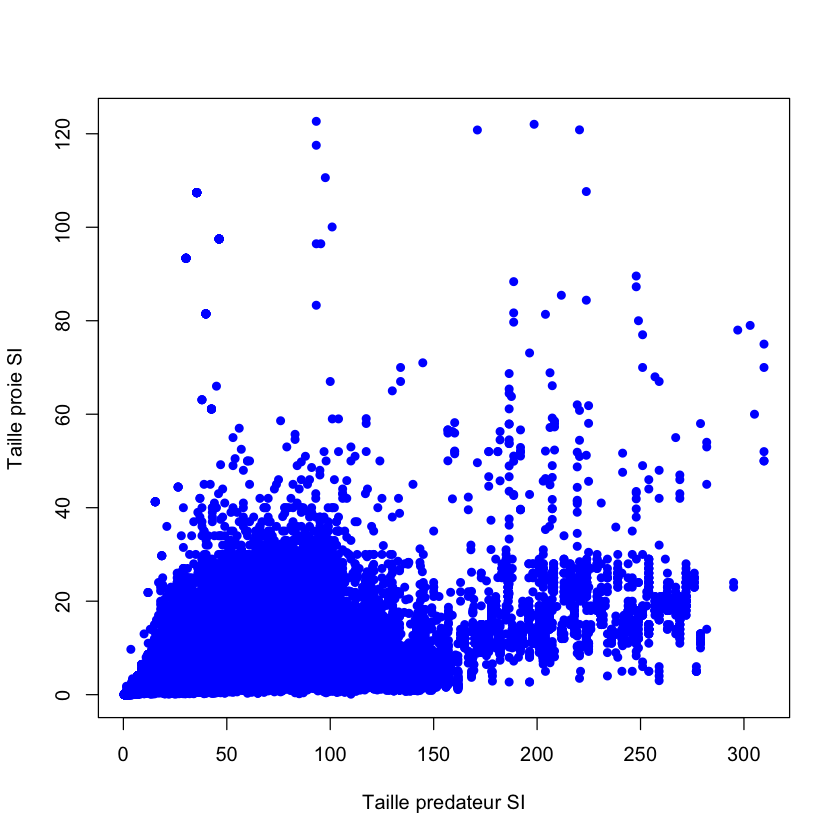

In [6]:
plot(
  x = data_clean$Standardised_predator_length,
  y = data_clean$SI_prey_length,
  xlab = "Taille predateur SI",
  ylab = "Taille proie SI",
  col = "blue", pch = 16,
  xlim = range(data_clean$Standardised_predator_length, na.rm = TRUE),
  ylim = range(data_clean$SI_prey_length, na.rm = TRUE)
)

Histogram

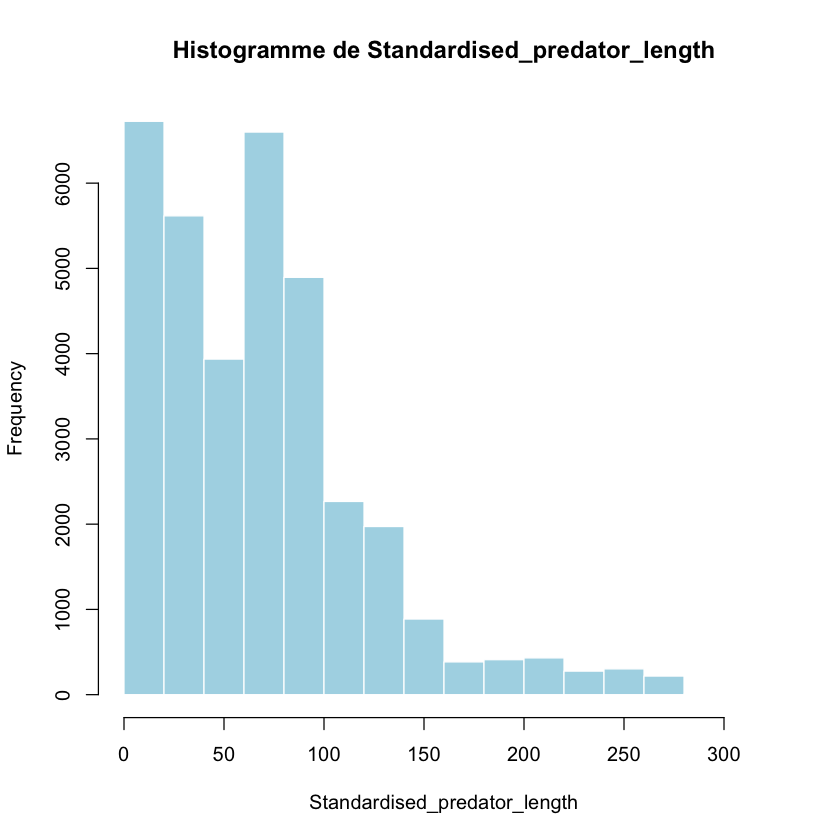

Skewness de Standardised_predator_length : 1.145222 


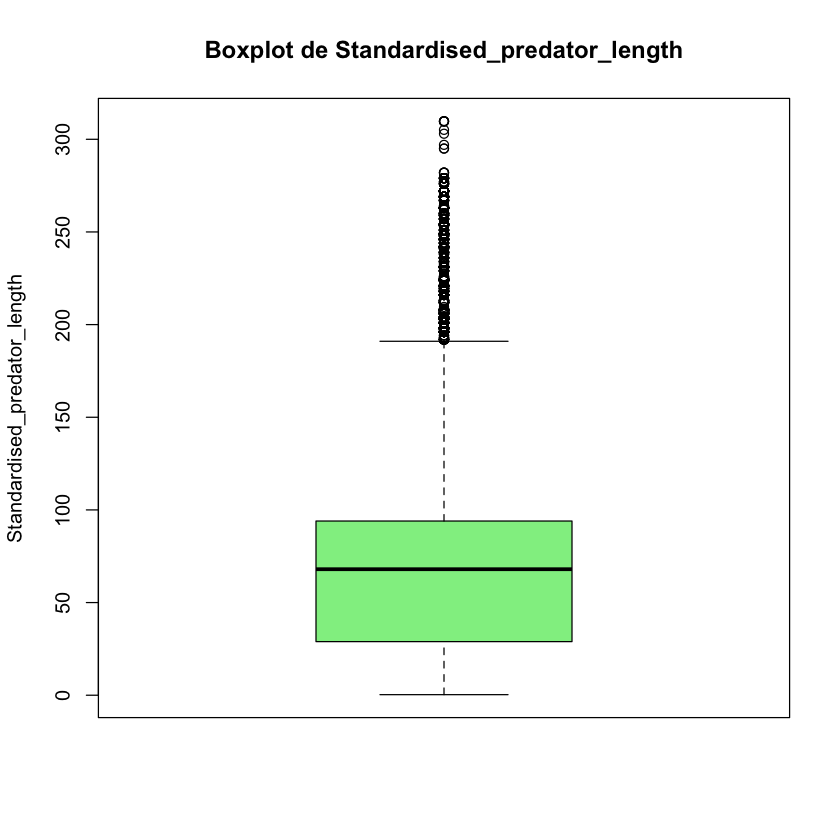

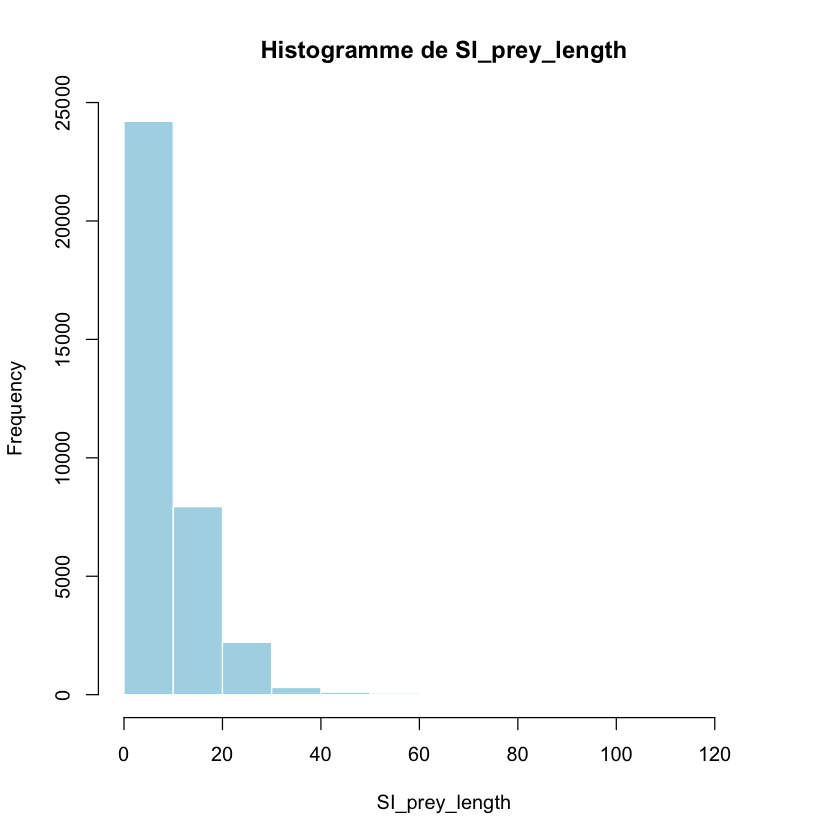

Skewness de SI_prey_length : 3.345034 


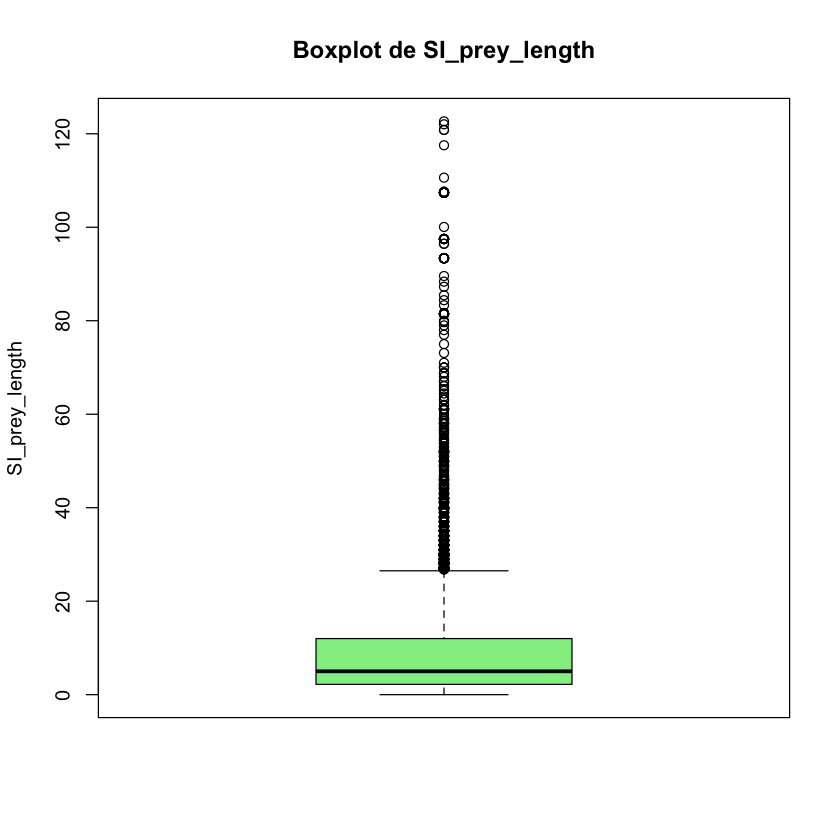

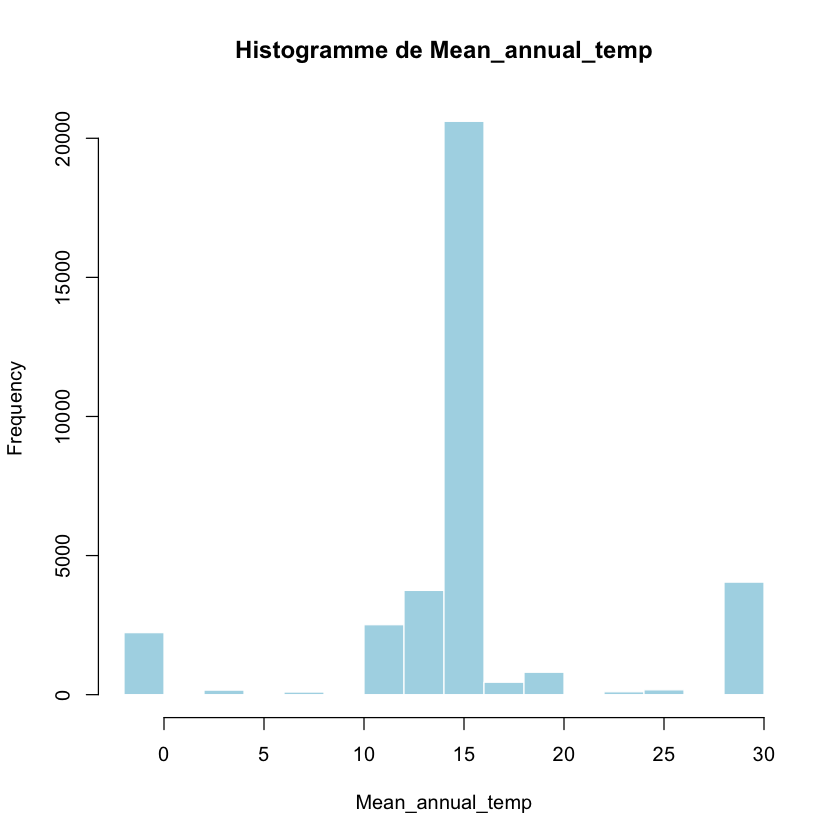

Skewness de Mean_annual_temp : -0.109606 


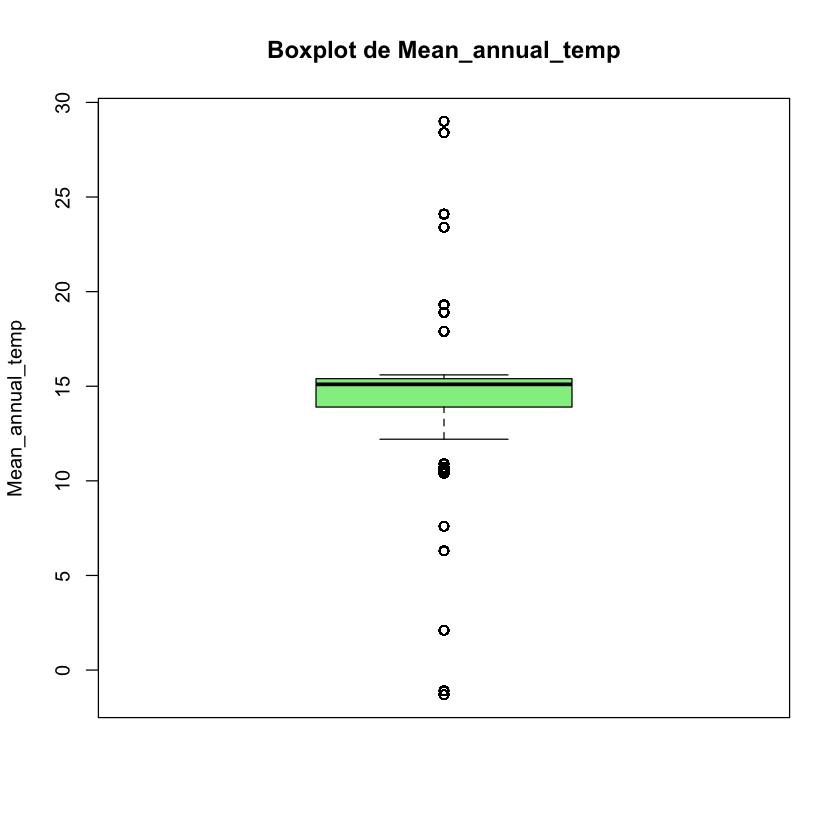

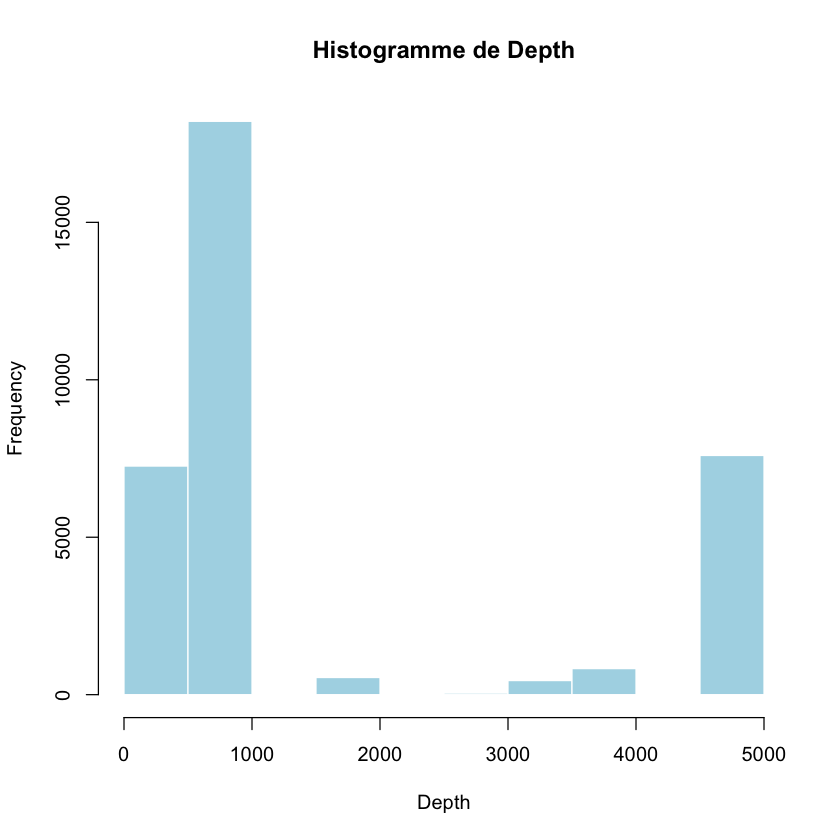

Skewness de Depth : 1.07112 


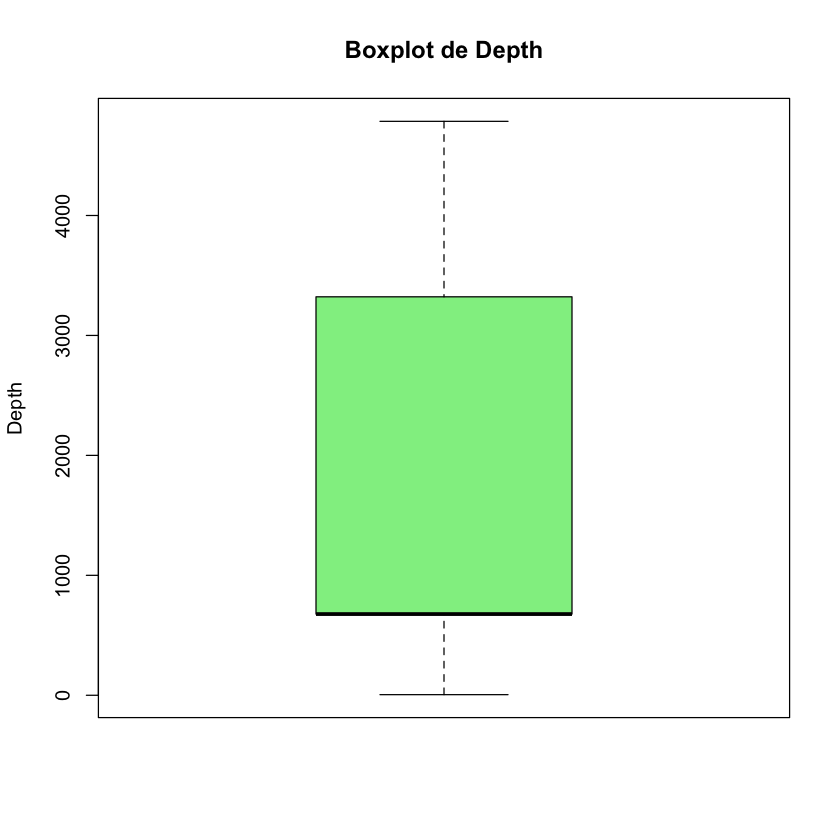

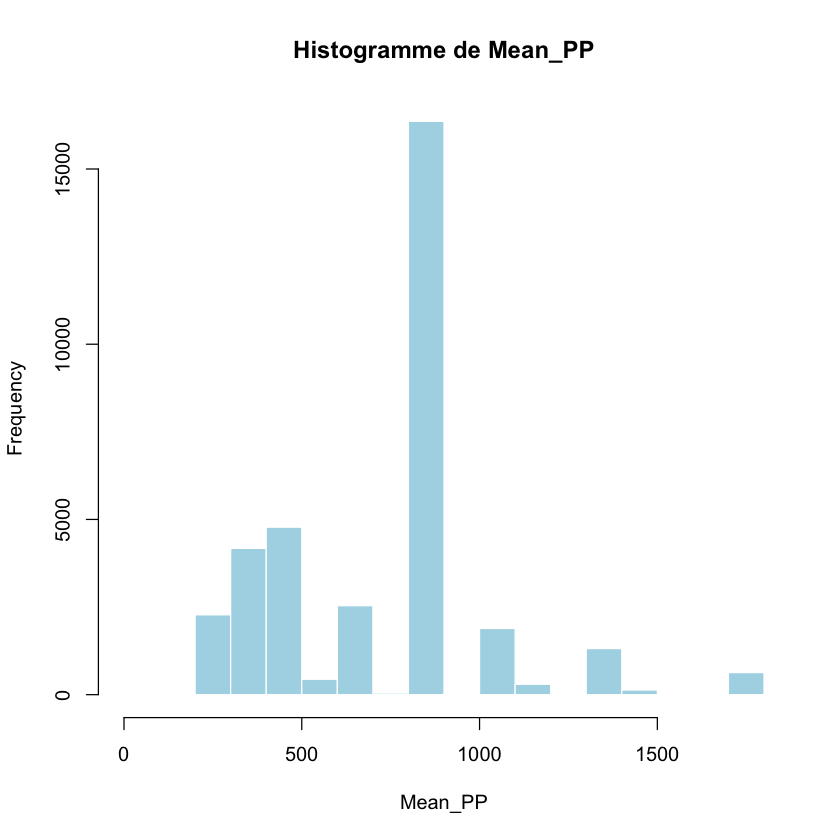

Skewness de Mean_PP : 0.4594894 


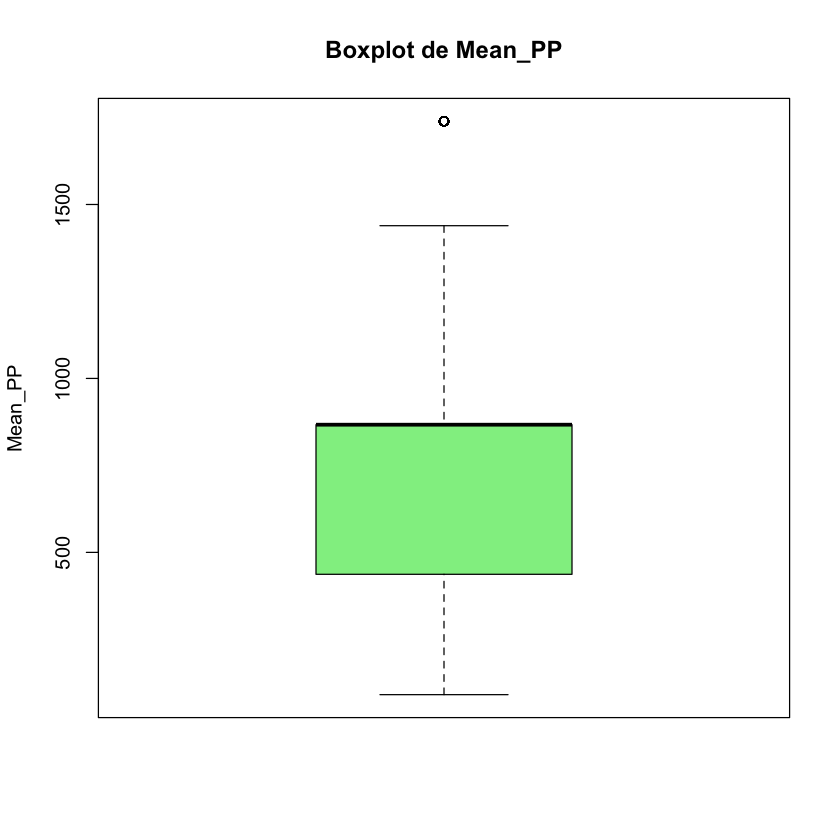

In [7]:
numeric_cols <- c("Standardised_predator_length", "SI_prey_length", "Mean_annual_temp", "Depth", "Mean_PP")

for (col in numeric_cols) {
  values <- data_clean[[col]]
  values <- values[!is.na(values)]
  
  if (length(values) > 0) {
    # Histogramme
    hist(values, main=paste("Histogramme de", col), xlab=col,
         col = "lightblue", border="white")
    
    # Boxplot
    boxplot(values, main = paste("Boxplot de", col), ylab=col, col="lightgreen")
    
    # Skewness test simple
    skew <- sum((values - mean(values))^3 / length(values)) / (sd(values)^3)
    cat("Skewness de", col, ":", skew, "\n")
  }
}

### Temperature vs location

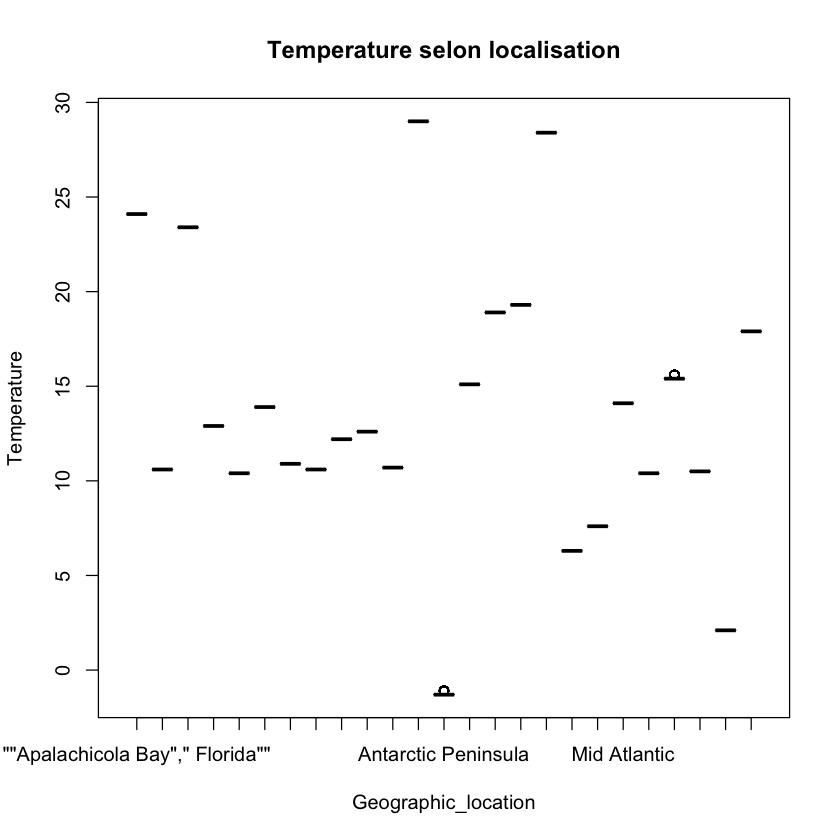

In [8]:
data_temp <- subset(data_clean, !is.na(Mean_annual_temp) & !is.na(Geographic_location))
boxplot(Mean_annual_temp ~ Geographic_location, data=data_temp,
        col="lightpink", main="Temperature selon localisation",
        ylab="Temperature")

### Size prey/predator vs environmental factors

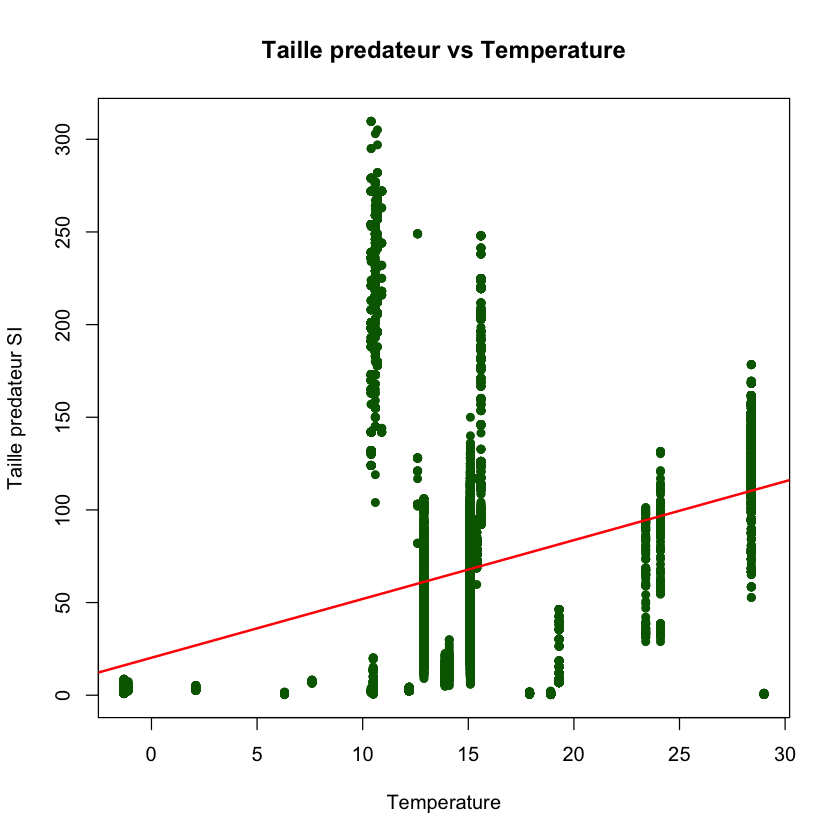

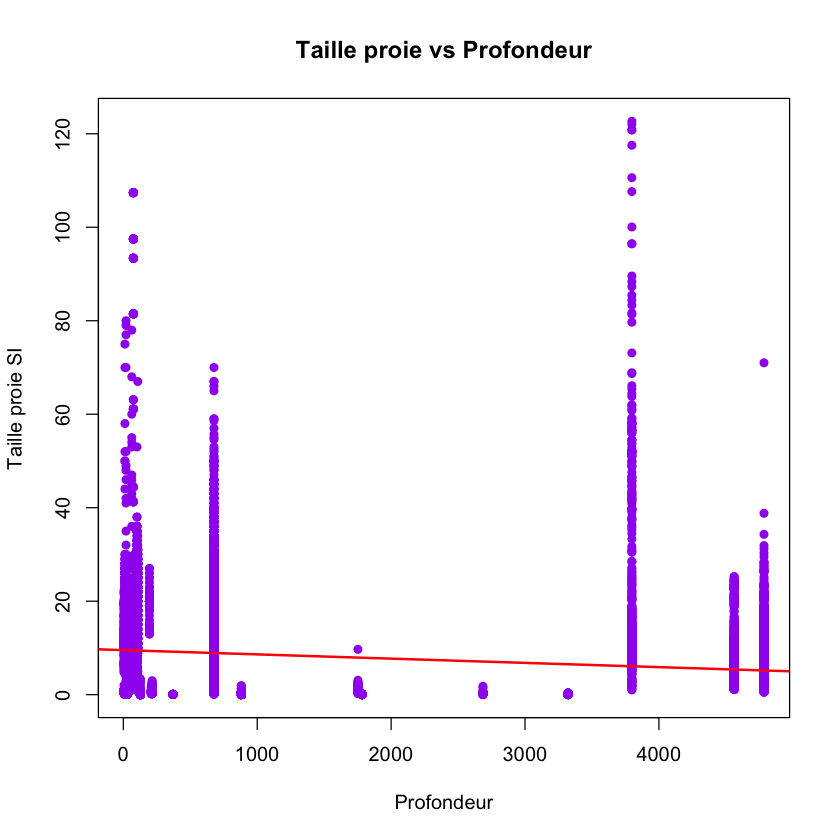

In [9]:
# Predator vs Température
data_env1 <- subset(data_clean, !is.na(Standardised_predator_length) & !is.na(Mean_annual_temp))
plot(data_env1$Mean_annual_temp, data_env1$Standardised_predator_length,
     xlab="Temperature", ylab="Taille predateur SI",
     col="darkgreen", pch=16, main="Taille predateur vs Temperature")
abline(lm(Standardised_predator_length ~ Mean_annual_temp, data=data_env1), col="red", lwd=2)

# Prey vs Profondeur
data_env2 <- subset(data_clean, !is.na(SI_prey_length) & !is.na(Depth))
plot(data_env2$Depth, data_env2$SI_prey_length,
     xlab="Profondeur", ylab="Taille proie SI",
     col="purple", pch=16, main="Taille proie vs Profondeur")
abline(lm(SI_prey_length ~ Depth, data=data_env2), col="red", lwd=2)

### Primary production regarding location

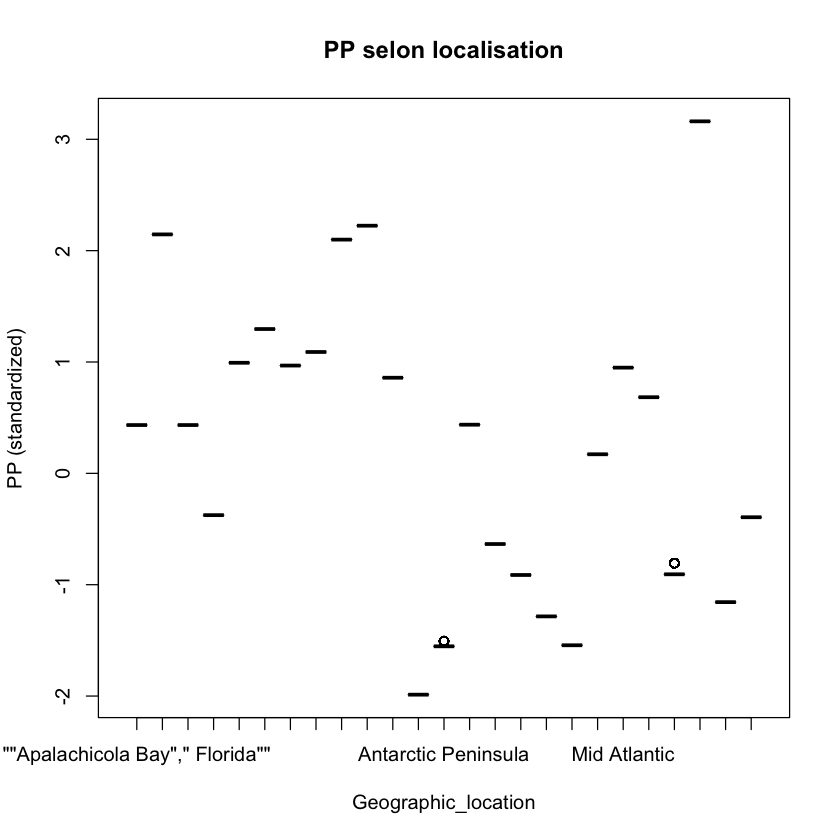

In [ ]:
data_pp <- subset(data_clean, !is.na(Mean_PP) & !is.na(Geographic_location))
boxplot(Mean_PP ~ Geographic_location, data=data_pp,
        col="lightblue", main="PP selon localisation",
        ylab="PP")

### Heatmap Taille pred/prey + Temp + Depth + Location + PP

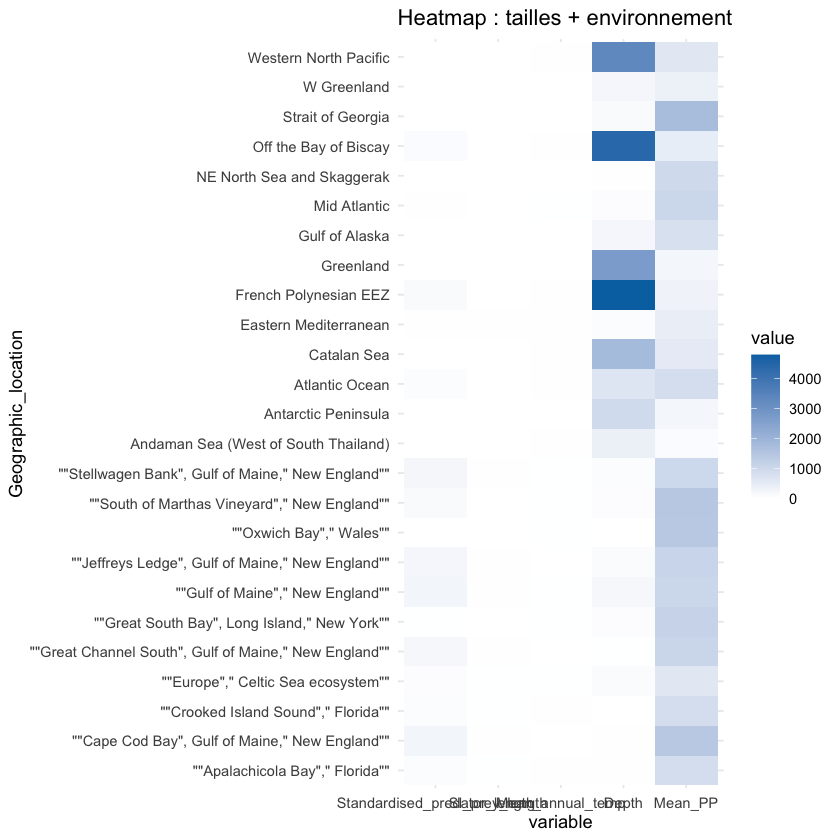

In [11]:
library(data.table)
library(ggplot2)

heat_data <- data_clean[!is.na(Standardised_predator_length) & 
                        !is.na(SI_prey_length) &
                        !is.na(Mean_annual_temp) & 
                        !is.na(Depth) & 
                        !is.na(Mean_PP)]

heat_data_dt <- as.data.table(heat_data)

heat_summary_dt <- heat_data_dt[, .(
  Standardised_predator_length = mean(Standardised_predator_length),
  SI_prey_length = mean(SI_prey_length),
  Mean_annual_temp = mean(Mean_annual_temp),
  Depth = mean(Depth),
  Mean_PP = mean(Mean_PP)
), by = Geographic_location]

heat_melt <- melt(heat_summary_dt, id.vars = "Geographic_location")

ggplot(heat_melt, aes(x=variable, y=Geographic_location, fill=value)) +
  geom_tile() +
  scale_fill_gradient(low="white", high="#0072B2") +
  theme_minimal() +
  labs(title="Heatmap : tailles + environnement")


### Heatmap Taille prédateur vs Taille proie

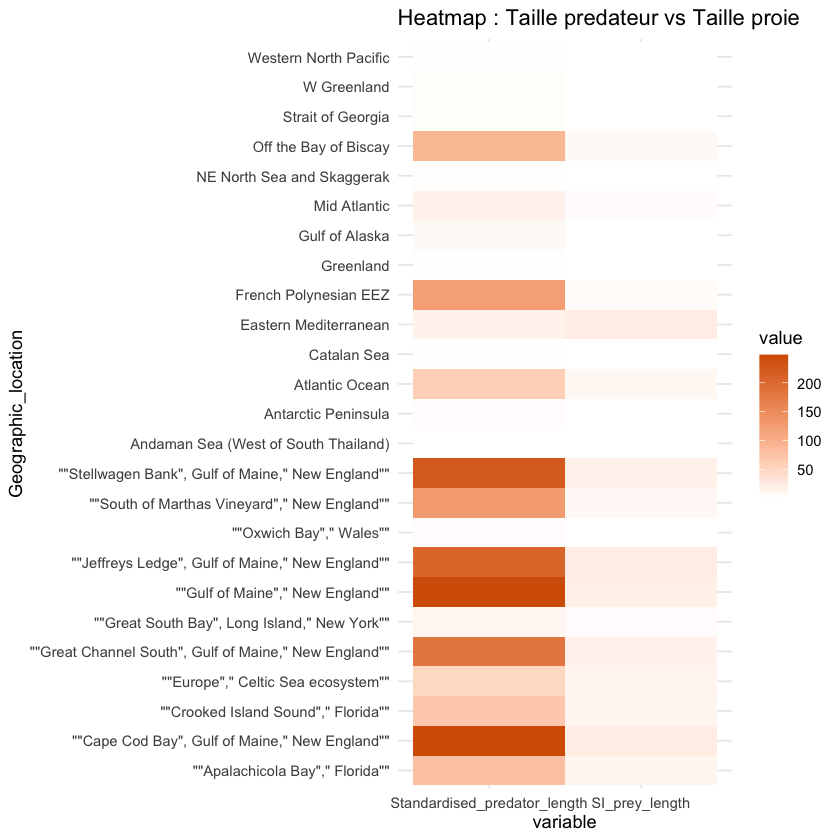

In [12]:
library(data.table)
library(ggplot2)

heat_size_data <- data_clean[!is.na(Standardised_predator_length) & 
                            !is.na(SI_prey_length)]


heat_size_dt <- as.data.table(data_clean[!is.na(Standardised_predator_length) & 
                                        !is.na(SI_prey_length)])



heat_size_summary_dt <- heat_size_dt[, .(
  Standardised_predator_length = mean(Standardised_predator_length),
  SI_prey_length = mean(SI_prey_length)
), by = Geographic_location]


heat_size_melt <- melt(heat_size_summary_dt, id.vars = "Geographic_location")

ggplot(heat_size_melt, aes(x = variable, y = Geographic_location, fill = value)) +
  geom_tile() +
  scale_fill_gradient(low = "white", high = "#D55E00") +
  theme_minimal() +
  labs(title = "Heatmap : Taille predateur vs Taille proie")
